In [54]:
import pandas as pd
print("Hello Jupyter!")

Hello Jupyter!


In [55]:
df = pd.read_csv('insurance.csv')

In [56]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [57]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [58]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [59]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [60]:
df['sex'] = df['sex'].apply(lambda x: 1 if x =='male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x =='yes' else 0)

In [61]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [62]:
df = df.join(pd.get_dummies(df.region, dtype = int)).drop('region', axis = 1)

In [63]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

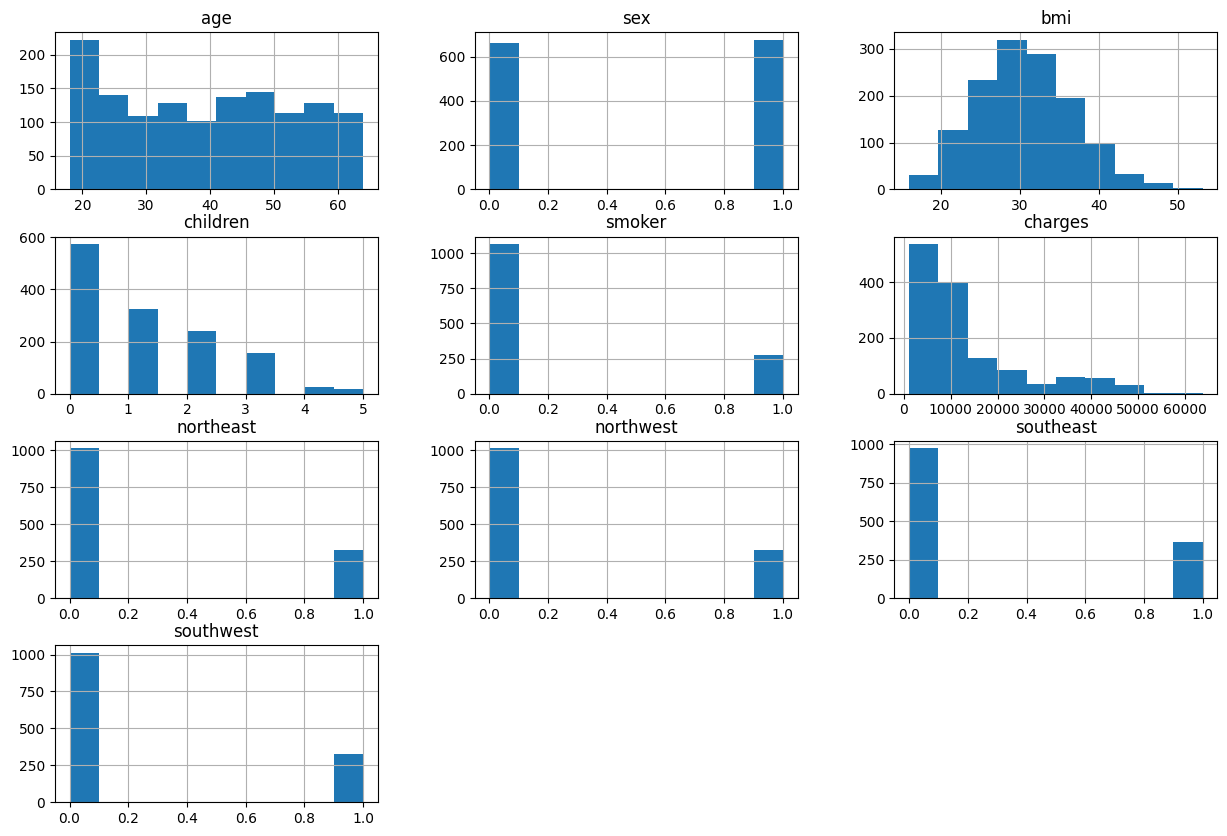

In [64]:
df.hist(figsize=(15,10))

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   int64  
 7   northwest  1338 non-null   int64  
 8   southeast  1338 non-null   int64  
 9   southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


<Axes: >

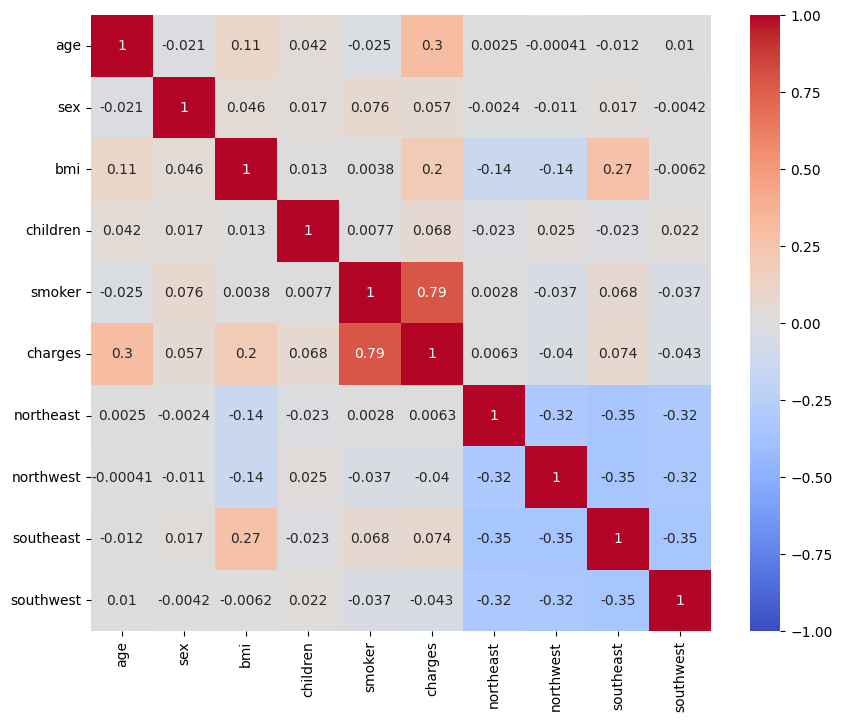

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm', vmin = -1, vmax = 1)

In [67]:
import sys
print(sys.executable)


/Users/meiqilai/Desktop/insurance_premium/.venv/bin/python


In [68]:
# Train random forest regressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

X = df.drop('charges', axis = 1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [69]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
model.score(X_test, y_test)

0.7761543779351919

In [71]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

In [72]:
rmse

5364.946983471988

In [73]:
df.charges.std()

np.float64(12110.011236694001)

In [74]:
y_test.std()

np.float64(11360.642628830206)

In [75]:
df.charges.median()

np.float64(9382.033)

In [76]:
mae = mean_absolute_error(y_pred, y_test)

In [77]:
mae

2861.30674533796

Text(0.5, 1.0, 'Prediction vs. Truth')

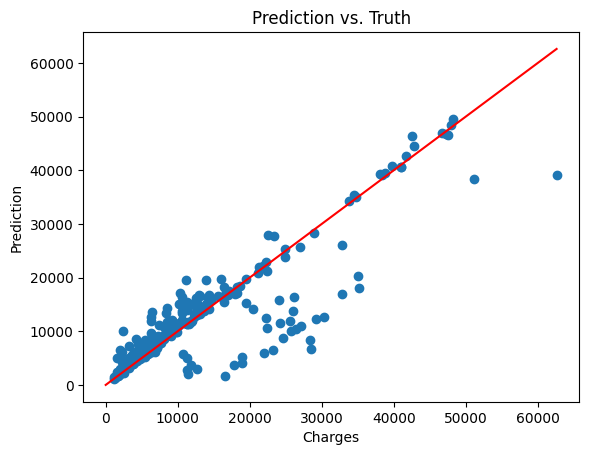

In [78]:
import numpy as np

plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color = 'red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs. Truth')

Text(0.5, 1.0, 'Feature Importances')

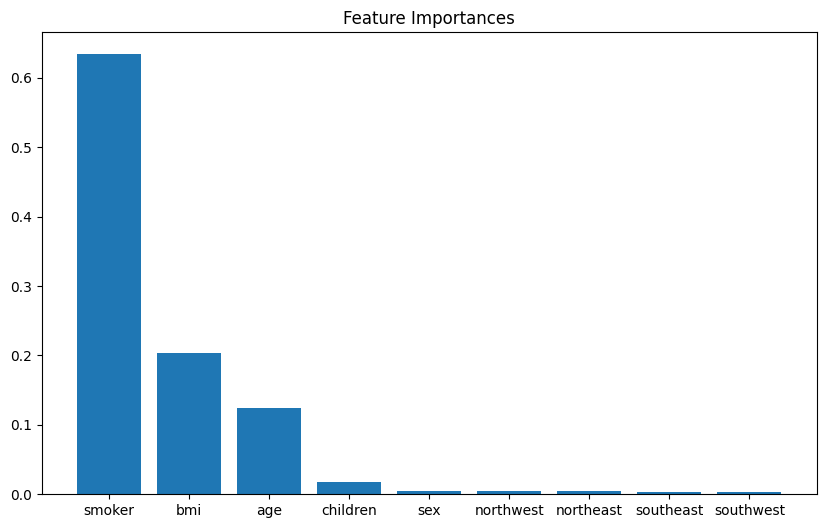

In [79]:
feature_importances = sorted(zip(model.feature_names_in_, model.feature_importances_), key = lambda x: x[1], reverse = True)
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in feature_importances], [x[1] for x in feature_importances])
plt.title('Feature Importances')

In [83]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 2, 5],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6]
}

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid=param_grid, cv = 5)



In [84]:
grid_search.fit(X_train, y_train)

,estimator,RandomForestR...sor(n_jobs=-1)
,param_grid,"{'max_depth': [None, 2, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [85]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [86]:
model = grid_search.best_estimator_


In [87]:
model

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [88]:
model.score(X_test, y_test)

0.7840468825965139

In [89]:
y_pred = model.predict(X_test)

In [91]:
rmse = root_mean_squared_error(y_test, y_pred)

In [92]:
rmse

5269.517741002556

In [94]:
mae = mean_absolute_error(y_test, y_pred)

In [95]:
mae

2774.3845308637865

Text(0.5, 1.0, 'Prediction vs. Truth')

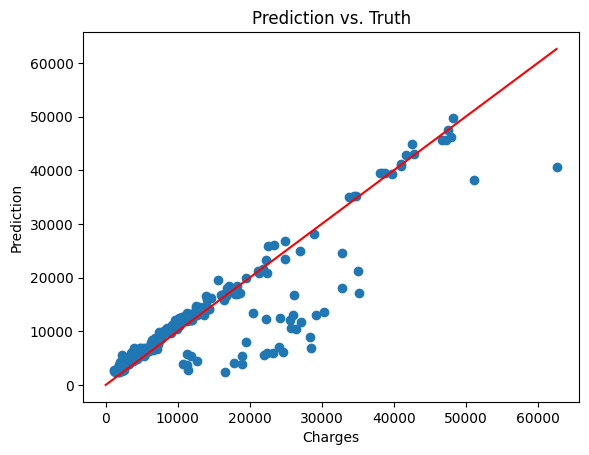

In [96]:
import numpy as np

plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color = 'red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs. Truth')

In [97]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 2, 5],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 4, 6]
}

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid=param_grid, cv = 5, scoring = 'neg_mean_absolute_error')



In [98]:
grid_search.fit(X_train, y_train)

,estimator,RandomForestR...sor(n_jobs=-1)
,param_grid,"{'max_depth': [None, 2, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 4, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [110]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [111]:
model = grid_search.best_estimator_

In [112]:
model

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [113]:
model.score(X_test, y_test)

0.7834697133828961

In [114]:
y_pred = model.predict(X_test)

In [115]:
rmse = root_mean_squared_error(y_test, y_pred)

In [116]:
rmse

5276.554856278362

In [117]:
mae = mean_absolute_error(y_test, y_pred)

In [118]:
mae

2784.890060187101